In [1]:
from keras.datasets import fashion_mnist

In [2]:
(x_train, y_train), (x_test, y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [6]:
np.random.seed(777)
class_name = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
sample_size = 9
random_idx = np.random.randint(60000, size = sample_size)

x_train = np.reshape(x_train/255,(-1,28,28,1))
x_test = np.reshape(x_test/255,(-1,28,28,1))
# 방법이 제각각이므로, 뭐가 있다는 것은 기억하고 있어야한다,





In [ ]:
x_train.shape

(60000, 28, 28, 1)

In [ ]:
x_train.min(), x_train.max()

(0.0, 1.0)

In [ ]:
y_train[0]

9

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train =  to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 777)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D

In [ ]:
model = Sequential([
    Conv2D(filters = 16, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),


    Conv2D(filters = 32, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),

    Conv2D(filters = 64, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
])

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['acc'])
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
model.fit(x_train, y_train, epochs = 30, batch_size=32, validation_data = (x_val, y_val))


Epoch 1/30
1313/1313 [==============================] - 47s 35ms/step - loss: 0.5329 - acc: 0.8052 - val_loss: 0.4716 - val_acc: 0.8253
Epoch 2/30
1313/1313 [==============================] - 46s 35ms/step - loss: 0.3403 - acc: 0.8771 - val_loss: 0.3269 - val_acc: 0.8825
Epoch 3/30
1313/1313 [==============================] - 47s 36ms/step - loss: 0.2931 - acc: 0.8920 - val_loss: 0.2861 - val_acc: 0.8982
Epoch 4/30
1313/1313 [==============================] - 48s 37ms/step - loss: 0.2629 - acc: 0.9038 - val_loss: 0.2787 - val_acc: 0.9002
Epoch 5/30
1313/1313 [==============================] - 52s 39ms/step - loss: 0.2357 - acc: 0.9127 - val_loss: 0.2743 - val_acc: 0.9007
Epoch 6/30
1313/1313 [==============================] - 50s 38ms/step - loss: 0.2135 - acc: 0.9219 - val_loss: 0.2545 - val_acc: 0.9082
Epoch 7/30
1313/1313 [==============================] - 49s 37ms/step - loss: 0.1956 - acc: 0.9268 - val_loss: 0.2628 - val_acc: 0.9099
Epoch 8/30
1313/1313 [==========================

In [ ]:
from keras.utils import plot_model

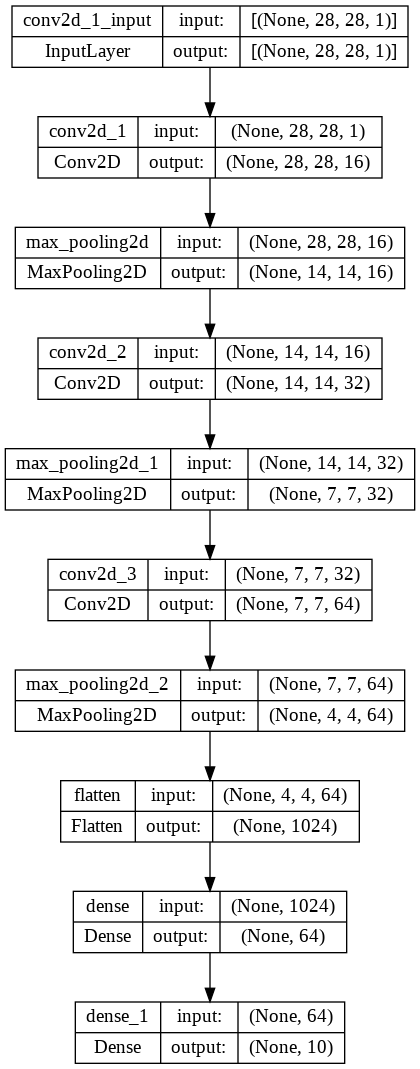

In [ ]:
plot_model(model, './model.png', show_shapes = True)

In [ ]:
pred = model.predict(x_test)

313/313 [==============================] - 5s 15ms/step


In [ ]:
pred[0]

array([1.3148830e-20, 2.4790080e-25, 5.9908212e-25, 4.7680706e-25,
       1.5347110e-20, 2.8639905e-14, 4.3383689e-23, 2.6732960e-12,
       9.5087283e-27, 9.9999994e-01], dtype=float32)

In [ ]:
np.round(np.round(pred[0],2))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
class_name[np.argmax(np.round(pred[0],2))]

'Ankle boot'

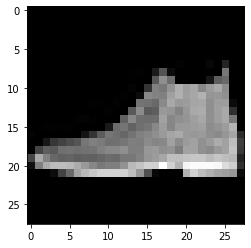

In [ ]:
plt.imshow(x_test[0].reshape((28,28)),cmap='gray')

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/model/07_cnn_fashion_mnist/model')

In [ ]:
model1 = Sequential([
    Conv2D(filters = 16, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),


    Conv2D(filters = 32, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),

    Conv2D(filters = 64, kernel_size = 3 , strides = (1,1), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)),
    MaxPool2D(pool_size = (2,2), strides = 2 , padding = 'same'),

    Flatten(),

    Dense(64, activation='relu'),

    Dense(10, activation='softmax')
])

In [ ]:
model1.load_weights('/content/drive/MyDrive/Colab Notebooks/sesac_deeplearning/model/07_cnn_fashion_mnist/model')

In [ ]:
pred = model1.predict(x_test)

313/313 [==============================] - 7s 21ms/step


In [ ]:
np.round(pred[0],2)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)